<br />
<div align="center">
  <a>
    <img src="https://biblioteca.aurens.com/universidades/colleges/logos/LaUdelFuturo.png" alt="Logo" width="30%">
  </a>
</div>

- 📌 Curso: **Machine Learning para IA - Universidad Creativa**
- 👨‍🏫 Profesor: **Angelo Ortiz Vega**

Repositorio Completo: [ucreativa-ai/Conceptos Básicos de Python para IA](https://github.com/angelortizv/ucreativa-ai/tree/main/02-PYTHON%20PARA%20IA)

# Exploratory Data Analysis (EDA) - Paso a paso

## 1. Importar Librerías

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
# Configuración estética para los gráficos
sns.set(style="whitegrid")

## 2. Cargar el dataset

In [49]:
# En este ejemplo usamos el dataset Titanic
df = pd.read_csv('./tested.csv')

## 3. Exploración Inicial del dataset
Revisamos la forma, columnas, primeras filas y estadísticas generales.

In [50]:
print(df.shape)          # Número de filas y columnas

(418, 12)


In [51]:
print(df.columns)        # Nombres de las columnas

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [52]:
print(df.head())         # Primeras filas del dataset

   PassengerId  Survived  Pclass  \
0          892         0       3   
1          893         1       3   
2          894         0       2   
3          895         0       3   
4          896         1       3   

                                           Name     Sex   Age  SibSp  Parch  \
0                              Kelly, Mr. James    male  34.5      0      0   
1              Wilkes, Mrs. James (Ellen Needs)  female  47.0      1      0   
2                     Myles, Mr. Thomas Francis    male  62.0      0      0   
3                              Wirz, Mr. Albert    male  27.0      0      0   
4  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female  22.0      1      1   

    Ticket     Fare Cabin Embarked  
0   330911   7.8292   NaN        Q  
1   363272   7.0000   NaN        S  
2   240276   9.6875   NaN        Q  
3   315154   8.6625   NaN        S  
4  3101298  12.2875   NaN        S  


In [53]:
print(df.info())         # Información sobre tipos de datos y valores nulos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB
None


In [54]:
print(df.describe())     # Estadísticas descriptivas para columnas numéricas

       PassengerId    Survived      Pclass         Age       SibSp  \
count   418.000000  418.000000  418.000000  332.000000  418.000000   
mean   1100.500000    0.363636    2.265550   30.272590    0.447368   
std     120.810458    0.481622    0.841838   14.181209    0.896760   
min     892.000000    0.000000    1.000000    0.170000    0.000000   
25%     996.250000    0.000000    1.000000   21.000000    0.000000   
50%    1100.500000    0.000000    3.000000   27.000000    0.000000   
75%    1204.750000    1.000000    3.000000   39.000000    1.000000   
max    1309.000000    1.000000    3.000000   76.000000    8.000000   

            Parch        Fare  
count  418.000000  417.000000  
mean     0.392344   35.627188  
std      0.981429   55.907576  
min      0.000000    0.000000  
25%      0.000000    7.895800  
50%      0.000000   14.454200  
75%      0.000000   31.500000  
max      9.000000  512.329200  


## 4. Limpieza de datos

### ¿Qué es limpieza de datos?
- Es el proceso de **identificar y corregir o eliminar datos incorrectos, incompletos o irrelevantes**.
- Se utiliza para mejorar la calidad del análisis y garantizar que los resultados sean confiables.


In [55]:
# Ver cuántos valores faltan por columna
print(df.isnull().sum())

print(df.isnull().sum())

# Ejemplos de limpieza:
# Rellenar valores faltantes en la columna 'Age' con la mediana
#df['Age'].fillna(df['Age'].median(), inplace=True)
df['Age'] = df['Age'].fillna(df['Age'].median())


# Eliminar columnas poco útiles o con demasiados datos faltantes
# Por ejemplo: 'Ticket' y 'Cabin'
df.drop(columns=[col for col in ['Ticket', 'Cabin'] if col in df.columns], inplace=True)

# Eliminar filas que tengan valores faltantes en la columna 'Embarked'
df.dropna(subset=['Embarked'], inplace=True)

# Verificamos nuevamente los valores nulos
print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           1
Embarked       0
dtype: int64


## 5. Análisis Univariado

### ¿Qué es análisis univariado?
Es el estudio de una sola variable a la vez. Sirve para entender su distribución, valores atípicos y comportamiento general.

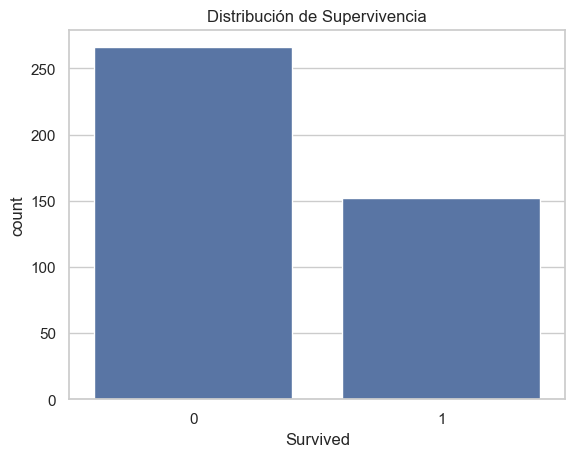

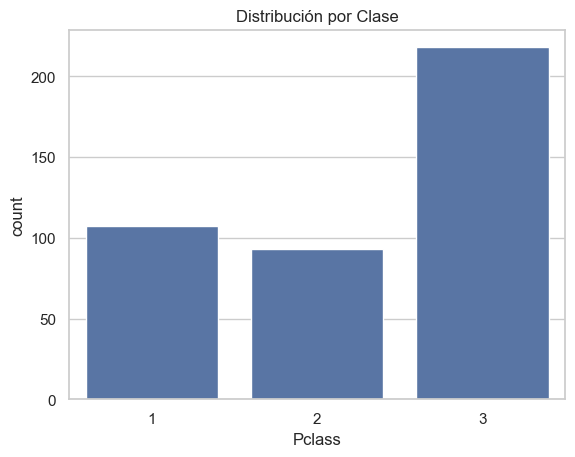

In [56]:
# Variables categóricas
sns.countplot(data=df, x='Survived')
plt.title('Distribución de Supervivencia')
plt.show()

sns.countplot(data=df, x='Pclass')
plt.title('Distribución por Clase')
plt.show()

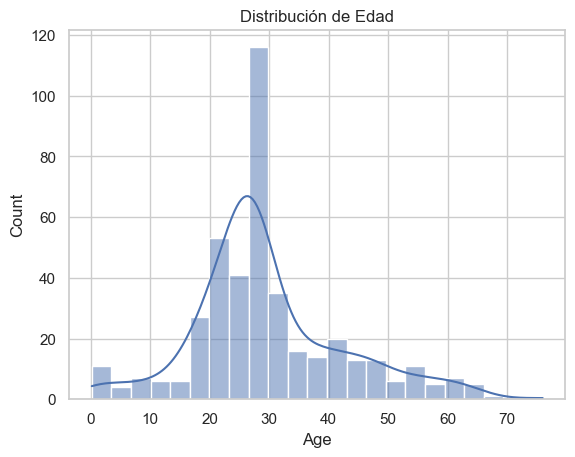

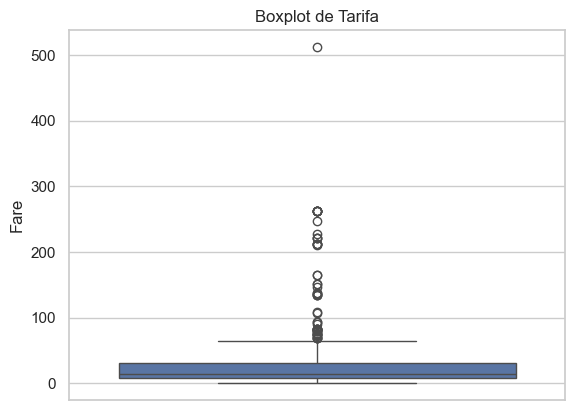

In [57]:
# Variables numéricas
sns.histplot(df['Age'], kde=True)
plt.title('Distribución de Edad')
plt.show()

sns.boxplot(data=df, y='Fare')
plt.title('Boxplot de Tarifa')
plt.show()

## 6. Análisis Bivariado

### ¿Qué es análisis bivariado?
Es el análisis de dos variables al mismo tiempo para entender relaciones, asociaciones o patrones entre ellas.


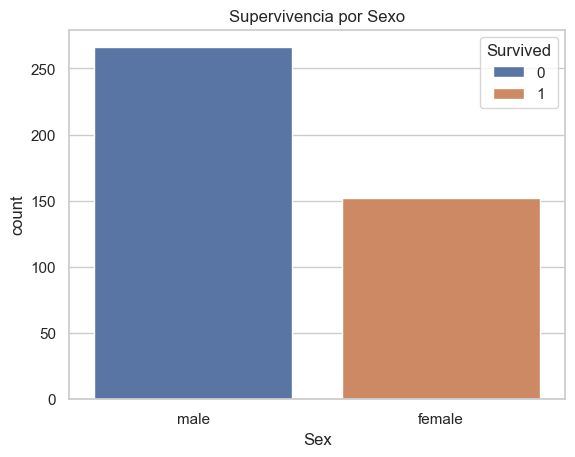

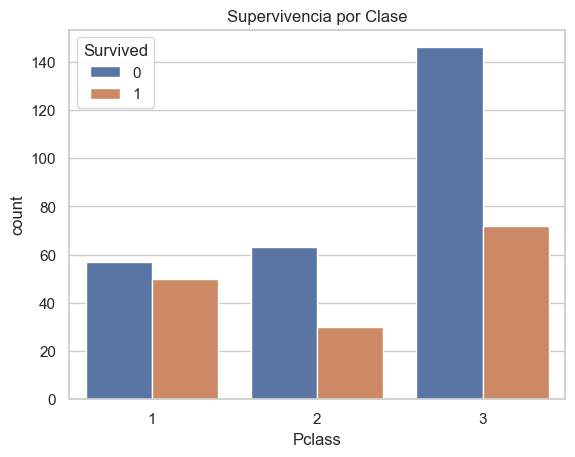

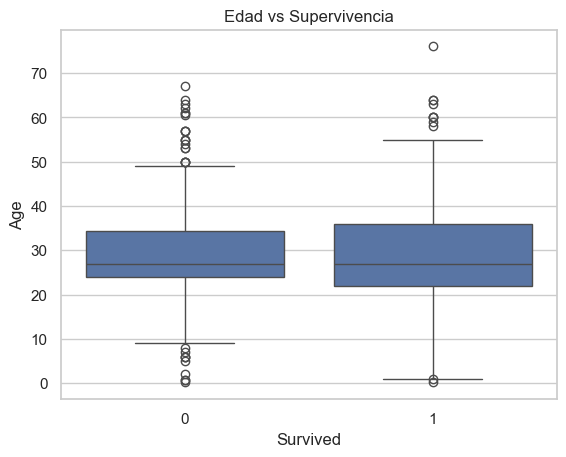

In [58]:
# Relación entre 'Survived' y 'Sex'
sns.countplot(data=df, x='Sex', hue='Survived')
plt.title('Supervivencia por Sexo')
plt.show()

# Relación entre 'Survived' y 'Pclass'
sns.countplot(data=df, x='Pclass', hue='Survived')
plt.title('Supervivencia por Clase')
plt.show()

# Distribución de edades según supervivencia
sns.boxplot(data=df, x='Survived', y='Age')
plt.title('Edad vs Supervivencia')
plt.show()


## 7. Correlación entre variables

### ¿Qué es la correlación?
- Es una medida estadística que indica cuánto y en qué dirección (positiva o negativa) están relacionadas dos variables.
- Va de -1 (relación negativa perfecta) a +1 (relación positiva perfecta), siendo 0 sin relación.

             PassengerId  Survived    Pclass       Age     SibSp     Parch  \
PassengerId     1.000000 -0.023245 -0.026751 -0.031447  0.003818  0.043080   
Survived       -0.023245  1.000000 -0.108615  0.008035  0.099943  0.159120   
Pclass         -0.026751 -0.108615  1.000000 -0.467853  0.001087  0.018721   
Age            -0.031447  0.008035 -0.467853  1.000000 -0.071197 -0.043731   
SibSp           0.003818  0.099943  0.001087 -0.071197  1.000000  0.306895   
Parch           0.043080  0.159120  0.018721 -0.043731  0.306895  1.000000   
Fare            0.008211  0.191514 -0.577147  0.347105  0.171539  0.230046   

                 Fare  
PassengerId  0.008211  
Survived     0.191514  
Pclass      -0.577147  
Age          0.347105  
SibSp        0.171539  
Parch        0.230046  
Fare         1.000000  


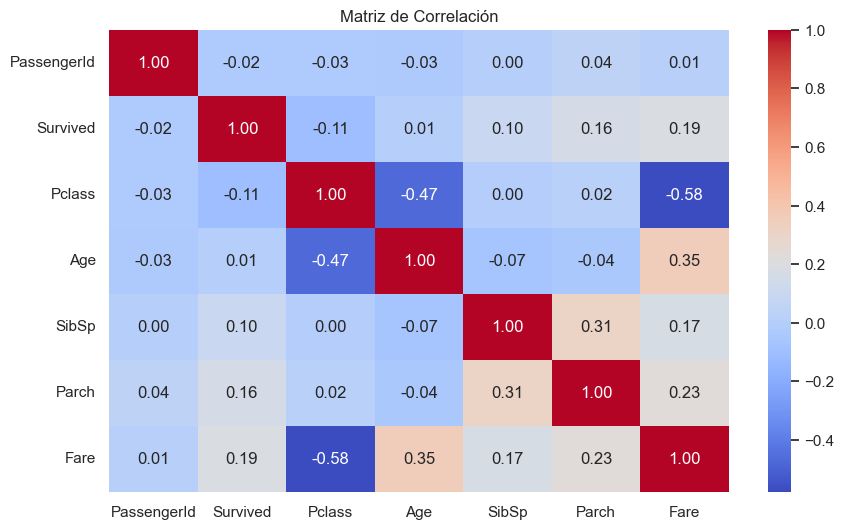

In [59]:
# Seleccionar solo variables numéricas
numeric_df = df.select_dtypes(include=['int64', 'float64'])
correlation_matrix = numeric_df.corr()
print(correlation_matrix)

# Visualización con mapa de calor
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación')
plt.show()

### Interpretación de la matriz de correlación

Cada valor representa la correlación de Pearson entre dos variables numéricas:

 | Par de Variables     | Valor de Correlación | Interpretación |
 |----------------------|----------------------|----------------|
 | Survived vs Fare     | 0.1915               | Ligera correlación positiva: quienes pagaron más, tienen una mayor probabilidad de haber sobrevivido. |
 | Survived vs Pclass   | -0.1086              | Muy leve correlación negativa: clase más baja, ligera tendencia a menor supervivencia. |
 | Survived vs Age      | 0.0080               | Prácticamente sin relación lineal. |
 | Survived vs SibSp    | 0.0999               | Relación leve positiva. Viajar con hermanos o pareja tiene un efecto menor. |
 | Survived vs Parch    | 0.1591               | Ligera correlación positiva. Tener padres o hijos a bordo puede influir algo. |

### Observaciones adicionales:
- Pclass vs Fare: correlación negativa fuerte (-0.5771): a menor clase, menor tarifa.
- Age vs Fare: correlación moderada (0.3471): personas mayores tienden a pagar más.
- SibSp y Parch tienen una correlación entre sí (0.3069), indicando que familias viajaban juntas.

Nota: Correlaciones bajas no significan que no haya relación útil. Puede haber patrones no lineales o combinaciones de variables relevantes.



## 8. Conclusión preliminar

A partir del EDA, se pueden generar hipótesis para modelos de machine learning o análisis estadísticos más avanzados. Por ejemplo: la clase social y el sexo parecen influir en la probabilidad de supervivencia.